In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
from cartopy.io import shapereader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
from scipy.ndimage import gaussian_filter as gf
import matplotlib.colors as colors
%matplotlib inline

In [16]:
xmin, xmax = 65, 100
ymin, ymax = 5, 40
ds = 0.25
xgrid = np.arange(xmin, xmax, ds)
ygrid = np.arange(ymin, ymax, ds)

sigma = 1.5

In [17]:
def to_grid(xpts, ypts, xgrid=xgrid, ygrid=ygrid, ds=ds):
	gridded = np.empty((len(ygrid), len(xgrid)))
	X,Y = np.meshgrid(xgrid, ygrid)
	
	for i, x in enumerate(xgrid):
		for j, y in enumerate(ygrid):
			N = np.sum((xpts>=x-ds/2)&(xpts<x+ds/2)&(ypts>=y-ds/2)&(ypts<y+ds/2))
			gridded[j,i]=N
	
	gridded/=(ds**2) #convert to sqdeg
	gridded/=(1.11*np.cos(Y*np.pi/180.)) #convert to /(100km)^2
	
	return gridded
	


In [18]:
plt.ioff()

fig = plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,3,1, projection=cartopy.crs.PlateCarree())
ax2 = plt.subplot(1,3,2, projection=cartopy.crs.PlateCarree())
ax3 = plt.subplot(1,3,3, projection=cartopy.crs.PlateCarree())

In [19]:
df = gpd.read_file("../../osm/wind-turbines.geojson")
df['x'] = df['geometry'].centroid.x
df['y'] = df['geometry'].centroid.y
print(df)
gridded = gf(to_grid(df.x, df.y), (sigma, sigma))
cs1 = ax1.contourf(xgrid, ygrid, gridded, cmap=plt.cm.RdPu, levels=[50,100,250,500,1000,2000,3000],extend='max', norm=colors.PowerNorm(gamma=0.5))
cb1 = plt.colorbar(cs1, ax=ax1, orientation='horizontal')

/tmp/ipykernel_1560/4034941433.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['x'] = df['geometry'].centroid.x
/tmp/ipykernel_1560/4034941433.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['y'] = df['geometry'].centroid.y


                    id              @id building   ele frequency  \
0        way/309138406    way/309138406     None  None      None   
1        way/389545367    way/389545367     None  None      None   
2        way/411649762    way/411649762     None  None      None   
3        way/411649764    way/411649764     None  None      None   
4        way/411649765    way/411649765     None  None      None   
...                ...              ...      ...   ...       ...   
31577  node/9574666758  node/9574666758     None  None        50   
31578  node/9574666759  node/9574666759     None  None        50   
31579  node/9574666760  node/9574666760     None  None        50   
31580  node/9574666761  node/9574666761     None  None        50   
31581  node/9574666762  node/9574666762     None  None        50   

      generator:method generator:output:electricity generator:plant  \
0                 None                         None            None   
1                 None                   

In [20]:
df = gpd.read_file("../../osm/solar.geojson")
df['x'] = df['geometry'].centroid.x
df['y'] = df['geometry'].centroid.y
print(df)
gridded = gf(to_grid(df.x, df.y), (sigma, sigma))
cs2 = ax2.contourf(xgrid, ygrid, gridded, cmap=plt.cm.YlOrRd, levels=[10,20,50,100,250,500,1000], extend='max', norm=colors.PowerNorm(gamma=0.5))
cb2 = plt.colorbar(cs2, ax=ax2, orientation='horizontal')

/tmp/ipykernel_1560/1966870786.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['x'] = df['geometry'].centroid.x
/tmp/ipykernel_1560/1966870786.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['y'] = df['geometry'].centroid.y


                     id                @id FIXME access addr:city  \
0      relation/6684556   relation/6684556  None   None      None   
1      relation/7358227   relation/7358227  None   None      None   
2     relation/11848354  relation/11848354  None   None      None   
3     relation/11849715  relation/11849715  None   None      None   
4     relation/11855383  relation/11855383  None   None      None   
...                 ...                ...   ...    ...       ...   
9478    node/9514202788    node/9514202788  None   None      None   
9479    node/9514202789    node/9514202789  None   None      None   
9480    node/9514202790    node/9514202790  None   None      None   
9481    node/9514202791    node/9514202791  None   None      None   
9482    node/9514202792    node/9514202792  None   None      None   

     addr:country addr:postcode addr:province addr:street  amenity  ...  \
0            None          None          None        None     None  ...   
1            None    

In [21]:
df = gpd.read_file("../../osm/hydro.geojson")
df['x'] = df['geometry'].centroid.x
df['y'] = df['geometry'].centroid.y
print(df)
gridded = gf(to_grid(df.x, df.y), (sigma, sigma))
cs3 = ax3.contourf(xgrid, ygrid, gridded, cmap=plt.cm.PuBuGn, levels=np.arange(1,15,1), extend='max', norm=colors.PowerNorm(gamma=0.5))
cb3 = plt.colorbar(cs3, ax=ax3, orientation='horizontal')

/tmp/ipykernel_1560/211928018.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['x'] = df['geometry'].centroid.x
/tmp/ipykernel_1560/211928018.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['y'] = df['geometry'].centroid.y


                  id              @id addr:city addr:hamlet addr:place  \
0       way/72064707     way/72064707      None        None       None   
1      way/161424451    way/161424451      None        None       None   
2      way/161424455    way/161424455      None        None       None   
3      way/161424463    way/161424463      None        None       None   
4      way/161424465    way/161424465      None        None       None   
..               ...              ...       ...         ...        ...   
325  node/9448388713  node/9448388713      None        None       None   
326  node/9467280985  node/9467280985      None        None       None   
327  node/9467280987  node/9467280987      None        None       None   
328  node/9488025766  node/9488025766      None        None       None   
329  node/9517057262  node/9517057262      None        None       None   

    addr:street            alt_name amenity  area barrier  ... start_date  \
0          None  Vajiralongkorn da

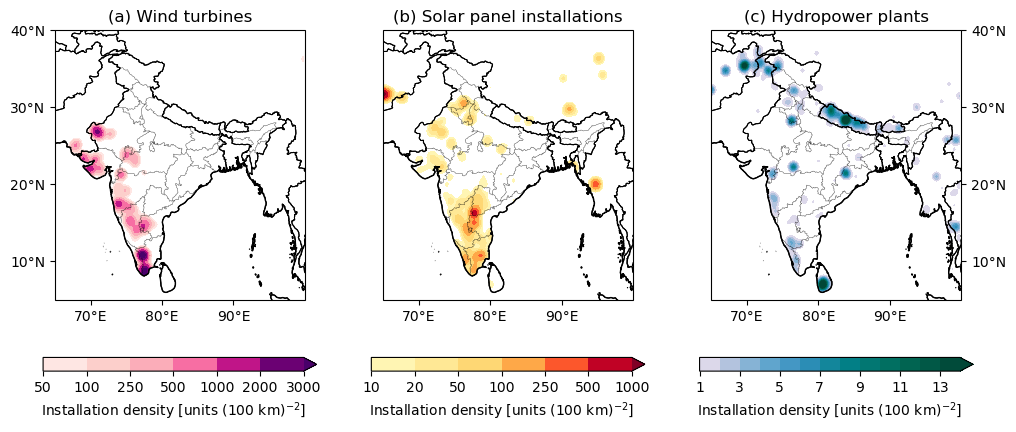

In [22]:
ax1.set_title("(a) Wind turbines")
ax2.set_title("(b) Solar panel installations")
ax3.set_title("(c) Hydropower plants")


df = gpd.read_file("../other-files/india_states_lores.zip")
shape_feature = ShapelyFeature(shapereader.Reader("../other-files/ne_10m_admin_0_countries_ind.shp").geometries(),
                                cartopy.crs.PlateCarree(), facecolor='none', edgecolor='k', lw=0.75)


for ax in ax1,ax2,ax3:	
	ax.add_feature(cartopy.feature.OCEAN, facecolor='w', linewidth=0, zorder=1)
	
	df.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=0.25, alpha=0.5)
	ax.add_feature(shape_feature, zorder=2)

	ax.set_xticks(np.arange(0,100,10))
	ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
	
	if ax in [ax1,ax3]:
		ax.set_yticks(np.arange(0,100,10))
		ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
	
	ax.set_xlabel("")
	ax.set_ylabel("")
	

ax3.yaxis.tick_right()

for cb in cb1, cb2, cb3:
	cb.set_label("Installation density [units (100 km)$^{-2}$]")

for ax in [ax1,ax2,ax3]:
	ax.coastlines()
	#ax.add_feature(cartopy.feature.BORDERS)
	ax.set_xlim([xmin, xmax])
	ax.set_ylim([ymin, ymax])

plt.show()